Warmup:
- A ball is dropped and bounces. At each rebound, the ball reaches half the height of the previous rebound.
- How high must the ball be dropped so it reaches exactly the height h after the sixth rebound?
- Write a .py script that accepts an integer from the user that represents the height of the ball after the sixth rebound.
- Your .py script should print out the height that the ball must be dropped to reach the given height at the sixth rebound.

In [36]:
def rebound(h):
    h = 64
    x = 1
    i=0
    while h > x:
        h*=.5
        i += 1
    return i

In [37]:
rebound(64)

6

In [35]:
h = 64
x = 1
i=0
while h > x:
    h*=.5
    i += 1
print(i)

6


In [33]:
3*.5

1.5

## Ryan's notes

In [42]:
height = int(input("After the 6th rebound, the ball is currently at what height? "))

starting_height = height * 2**6

print(f'The ball started at the height of {starting_height}.')

After the 6th rebound, the ball is currently at what height?5
The ball started at the height of 320.


### Practice my function

In [1]:
import prepare
import acquire

In [2]:
telco = acquire.get_telco_data()

In [3]:
telco = prepare.prep_telco(telco)

/Users/fostermark/codeup-data-science/classification-exercises/prepare.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_charges = df.total_charges.astype(float)


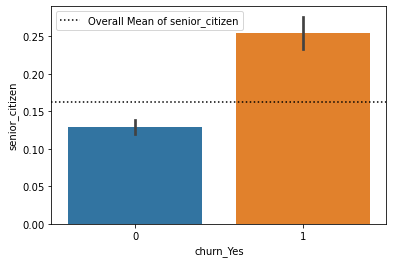

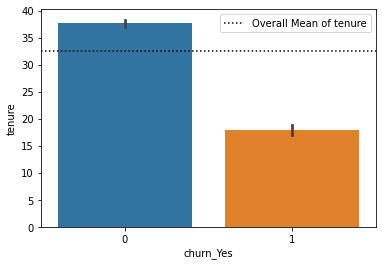

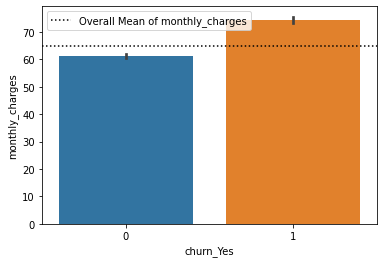

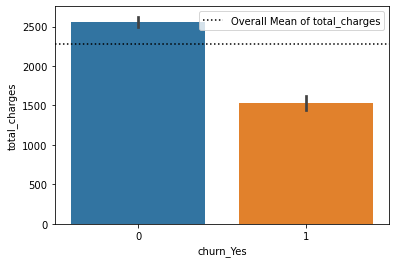

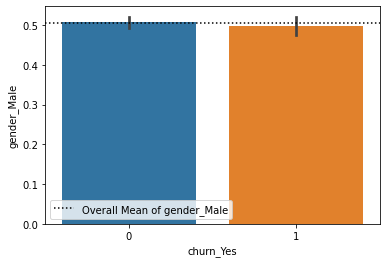

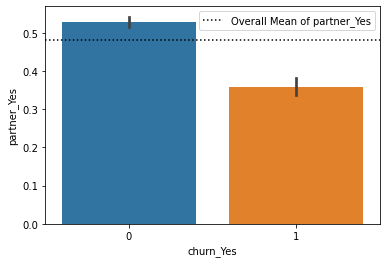

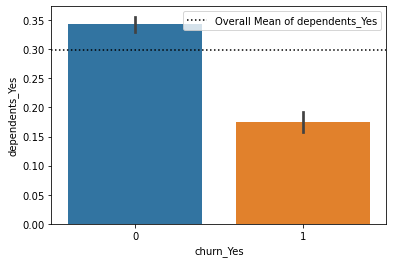

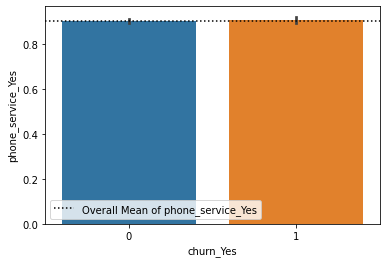

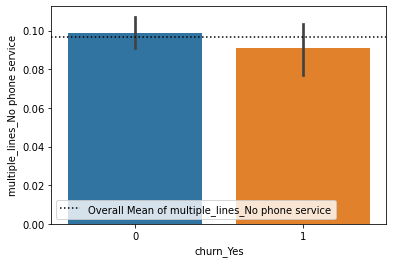

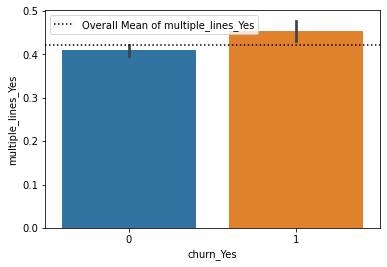

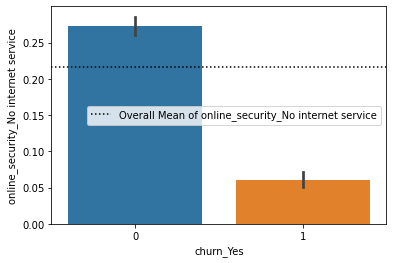

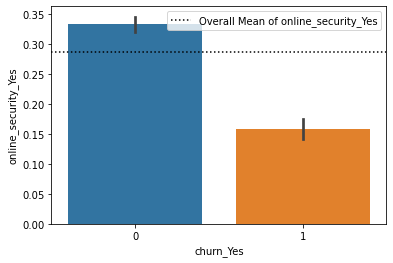

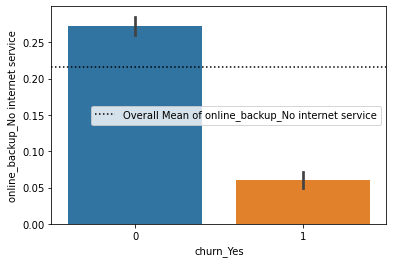

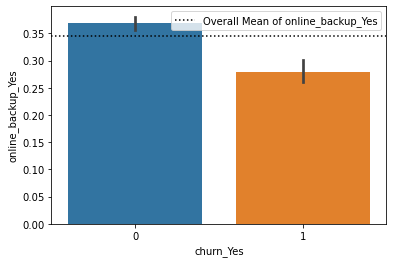

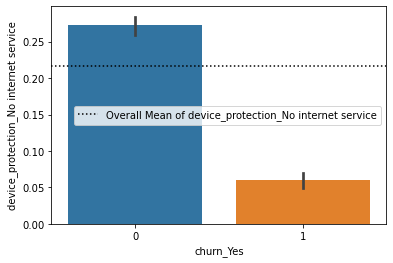

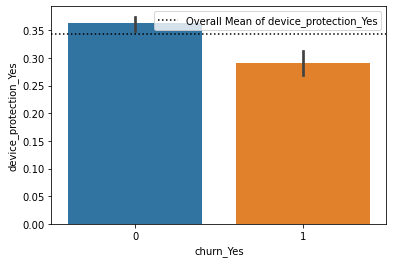

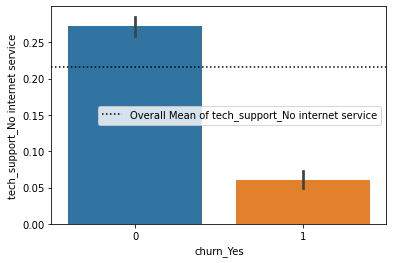

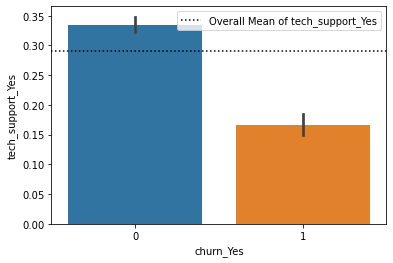

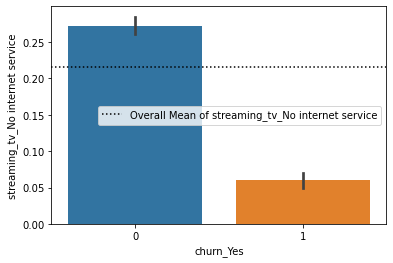

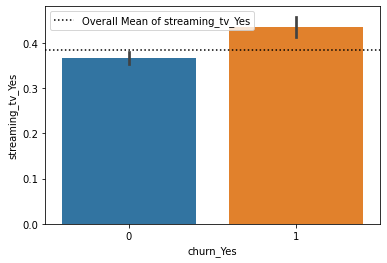

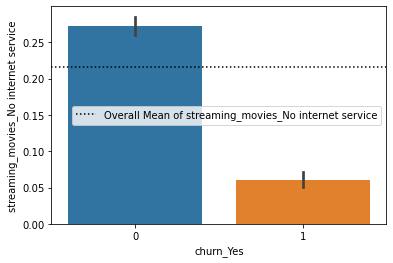

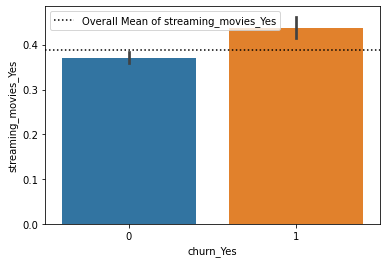

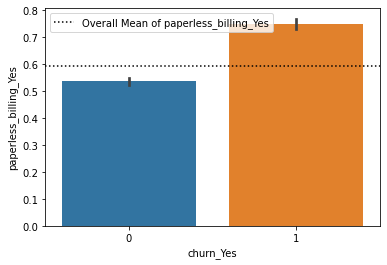

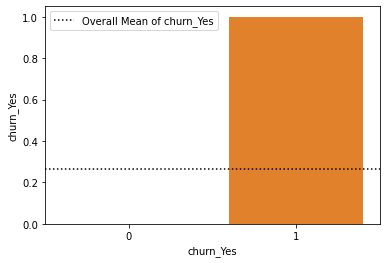

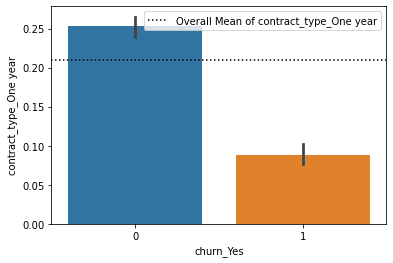

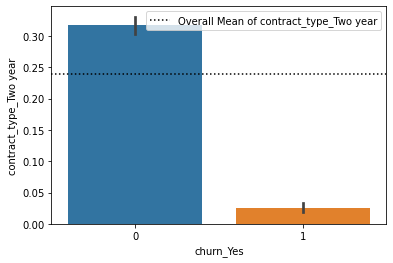

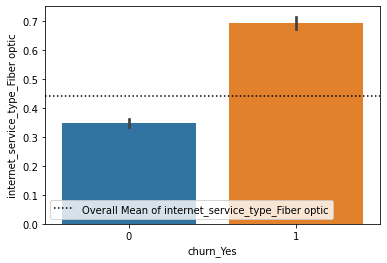

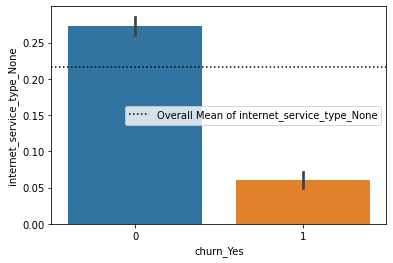

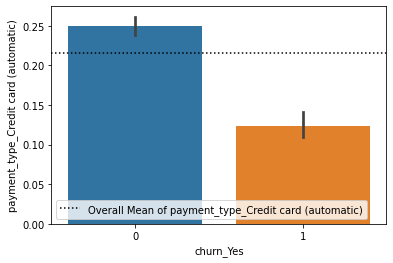

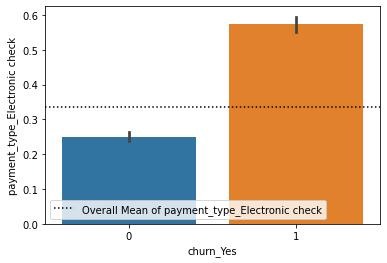

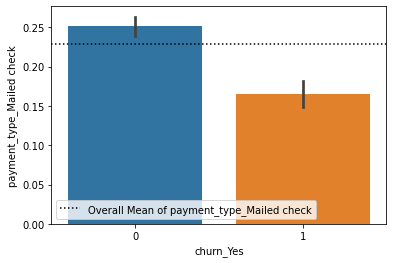

In [6]:
prepare.explore_num_bvar(telco, 'churn_Yes')

## 2022.10.24

Using the tips dataset. Find me the max total bill of the table who dined on Sunday and tipped at least 2$

In [3]:
import pandas as pd
import seaborn as sns

In [7]:
tips_df = sns.load_dataset('tips')

In [8]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
sun_diners = tips_df[(tips_df.day == 'Sun') & (tips_df.tip >= 2)]

In [14]:
sun_diners.total_bill.max()

48.17

## 2022.10.25

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import prepare

import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.shape

(244, 7)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(243, 7)

In [9]:
train, validate, test = prepare.train_validate_test_split(df, 'smoker')

In [10]:
train.shape, validate.shape, test.shape

((181, 7), (37, 7), (25, 7))

In [11]:
num_vars = list(train.select_dtypes(include=np.number).columns)
cat_vars = list(train.select_dtypes(include='category').columns)

total_bill
count    181.000000
mean      19.501547
std        8.861023
min        3.070000
25%       13.160000
50%       17.470000
75%       23.950000
max       50.810000
Name: total_bill, dtype: float64


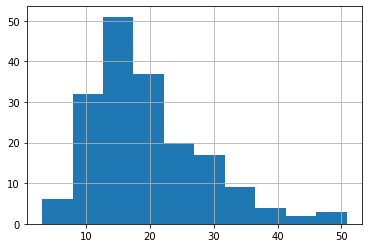

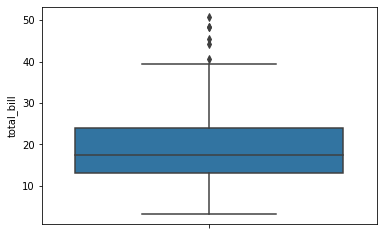

tip
count    181.000000
mean       2.985470
std        1.458888
min        1.000000
25%        2.000000
50%        2.740000
75%        3.500000
max       10.000000
Name: tip, dtype: float64


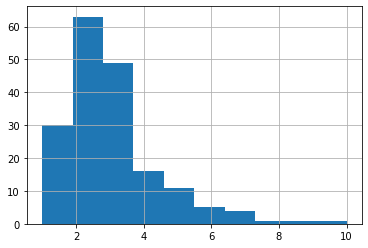

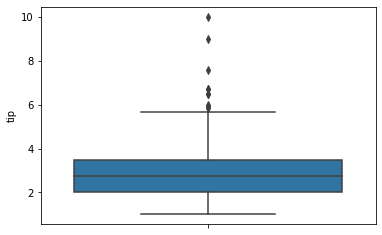

size
count    181.000000
mean       2.513812
std        0.860282
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64


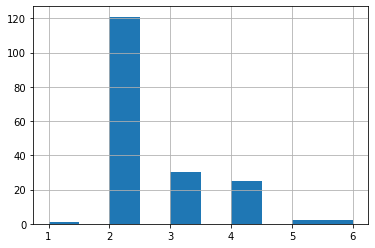

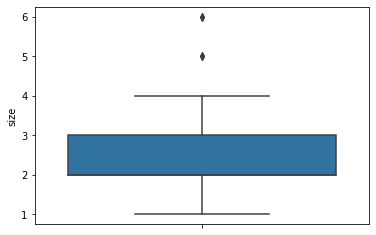

In [12]:
prepare.explore_num_uvar(train)

sex
Male      157
Female     86
Name: sex, dtype: int64
Male      64.609053
Female    35.390947
Name: sex, dtype: float64


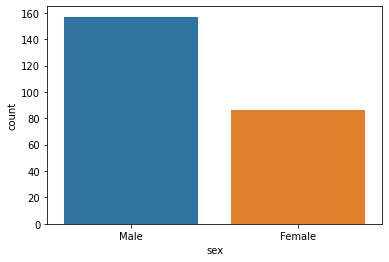

smoker
No     151
Yes     92
Name: smoker, dtype: int64
No     62.139918
Yes    37.860082
Name: smoker, dtype: float64


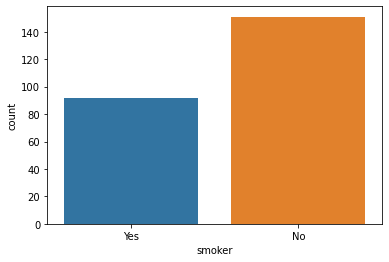

day
Sat     87
Sun     76
Thur    61
Fri     19
Name: day, dtype: int64
Sat     35.802469
Sun     31.275720
Thur    25.102881
Fri      7.818930
Name: day, dtype: float64


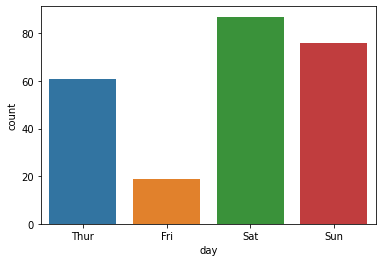

time
Dinner    176
Lunch      67
Name: time, dtype: int64
Dinner    72.427984
Lunch     27.572016
Name: time, dtype: float64


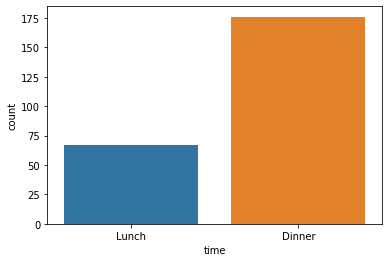

In [15]:
for col in cat_vars:
        print(col)
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True)*100)
        sns.countplot(x=col, data=df)
        plt.show()

In [16]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.prep_for_model(train, validate, test, 'smoker')

In [18]:
list(train.select_dtypes(exclude=np.number).columns)

['sex', 'smoker', 'day', 'time']